<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/05_05_%ED%8A%B8%EB%A6%AC%EC%9D%98%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 지금까지 K-최근접 이웃 알고리즘, 선형회귀, 릿지, 라쏘, 다향회귀, 로지스틱회귀
# 등을 배웠고 확률적 경사 하강법을 이용한 분류와 결정트리 모델까지 학습을 함

# 테스트 세트말고 검증세트를 사용하는 cv(Cross validate), hyper parameter tuning 등을 사용

# 코랩에는 웬만한 AI용 라이브러리가 설치되어있는데 안되어있는 것은 수동으로 설치해주어야함
!pip install xgboost
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/1

In [ ]:
# 앙상블 : 단어 그대로 여러 단순한 모델을 결합하여 정확한 모델을 만드는 방법
# 정형데이터 : 지금까지 학습한 수치자료가 있는 값
# 비정형데이터 : 데이터베이스나 엑셀로 표현하기 어려운 데이터
#               (텍스트데이터, 사진, mp3 등) -> 신경망 알고리즘
# 랜덤 포레스트 : 결정 트리를 랜덤하게 만들어 결정트리(나무) -> 숲을 만듦
#               -> 최종 예측
# 1000개의 샘플이 들어있는 가방에서 100개의 샘플을 뽑을 때,
# 1개를 뽑고 다시 가방에 넣음
# 중복된 샘플을 뽑을 수 있음 -> 부트스트랩 샘플
# 부트스트랩 : 데이터 세트에서 중복을 허용하여 데이터를 샘플링

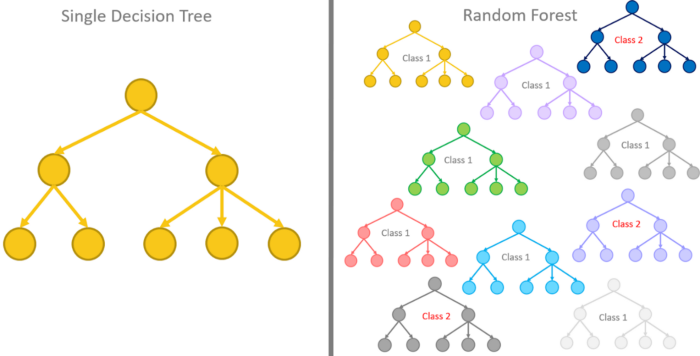

In [ ]:
# 분류 모델인 RandomForestClassifier는
# 기본적으로 전체 특성 개수의 제곱근만큼 특성을 선택한다.
# 즉 4개의 특성이 있다면 노드마다 2개를 랜덤하게 선택하여 사용
# 다만 회귀 모델인 RandomForestRegressor는 전체 특성을 사용
# 사이킷 런의 랜덤포레스트는 기본적으로 100개의 결정트리를 이런 방식으로 훈련한다.

# 그 다음 분류일 때는 각 트기ㅢ 클래스별 확률을 평균하여
# 가장 높은 확률을 가진 클래스를 예측으로 삼는다.
# 회귀일 때는 단순히 각 트리의 예측을 평균함

# 분류 : 샘플을 몇개의 클래스 중 하나로 분류하는 문제
# 회귀 : 임의의 어떤 숫자를 예측하는 문제

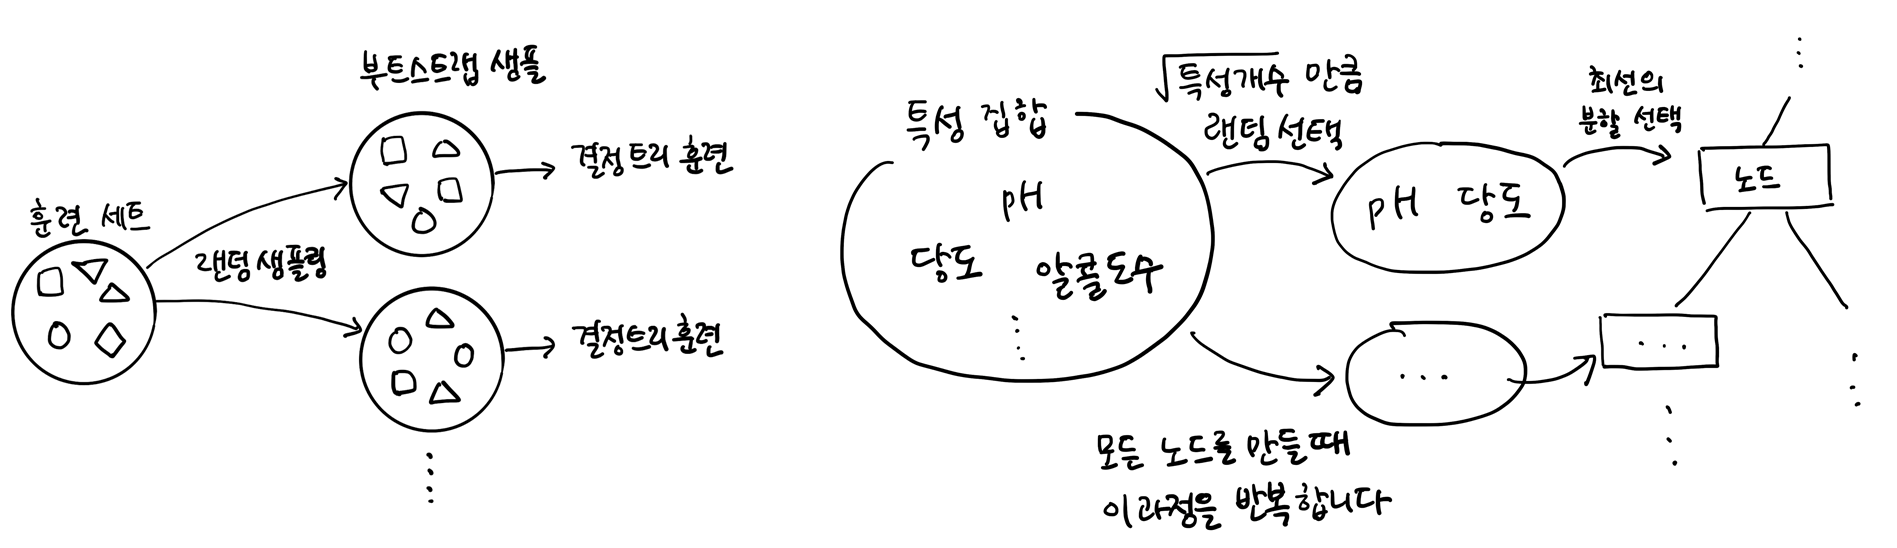

In [ ]:
# 와인 찾기 데이터
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine[['class']].to_numpy()
print(data)
print('-'*40)
print(target)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]
----------------------------------------
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
# 훈련세트 80%, 테스트세트 20%
train_input,test_input,train_target,test_target = train_test_split(
    data,target,test_size=0.2,random_state=42)
print(train_input.shape,test_input.shape) # 5197개 : 1300개 , 특성 3개
# 테스트세트 20%는 검증이 끝난 마지막 단계에서 평가용으로 사용

(5197, 3) (1300, 3)


In [ ]:
# 교차점증
from sklearn.model_selection import cross_validate
# 100개의 결정트리 사용 앙상블
from sklearn.ensemble import RandomForestClassifier

# n_jobs=-1 : 모든 cpu 사용
rf = RandomForestClassifier(n_jobs=-1,random_state=42)
# return_train_score = True : 검증 점수와 훈련 세트에 대한 점수도 리턴
scores = cross_validate(rf,train_input,train_target,return_train_score = True,n_jobs=-1)

print(np.mean(scores['train_score']),np.mean(scores['test_score']))
# train_score 99.73% 과대적합 /test_score 89.05%

0.9973541965122431 0.8905151032797809


In [ ]:
# 랜덤 포레스트는 결정트리의 앙상블이기 때문에 결정트리가 제공하는 중요한 매개변수를 모두 제공함
# 결정트리의 큰 장점 중 하나인 특성 중요도를 계산한다.
# 랜덤 포레스트의 특성 중요도는 각 결정 트리의 특성 중요도를 취합한 것이다.
# 훈련 후에 중요도를 출력해보자.
rf.fit(train_input,train_target)
print(rf.feature_importances_)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.23167441 0.50039841 0.26792718]


In [ ]:
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 현재 결과
# [0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과
#    알콜도수     당도       pH
# 당도의 중요도가 감소하고 알콜도수와 pH 중요도가 상승함
# -> 랜덤포레스트가 특성 일부를 랜덤하게 선택하여 결정트리를 훈련함(중복가능)
# 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회가 됨
# -> 과대적합을 줄임,

In [ ]:
# RandomForestClassifier 기능 중에 자체적으로 모델을 평가하는 점수를 얻을 수 있다.
# OOB(OutOfBag) 부트스트랩에 포함되지않고 남은 샘플 -> 결정 트리 평가용(검증세트)
# oob_score = True : 랜덤포레스튼즌 각 결정트리의 OOB 점수를 평균하여 출력(oob_score_)
rf = RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42)

rf.fit(train_input,train_target)
print(rf.oob_score_) # 교차 검증 점수와 비슷한 결과를 얻음  89.34%
# OOB 점수를 사용하면 교차검증을 대신할 수 있어 결과적으로 훈련 세트에 더 많은 샘플을 사용할 수 있음
# ---------------------------- RandomForestClassifier 끝 ---------------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8934000384837406


In [ ]:
# 엑스트라 트리 : 100개의 결정 트리 훈련 -> 부트스트랩 샘플을 사용하지 않음(전체 훈련세트 사용)
# 대신 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작이로 분할함
# 엑스트라 트리의결정트리 splitter = 'random'
# 하나의 결정 트리에서 특성을 무작위로 분할한다면 성능이 낮아지겠지만
# 많은 트리를 앙상블 하기 때문에 과대 적합을 막고 검증세트의 점수를 높이는 효과가 있다
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1,random_state=42)
scores = cross_validate(et,train_input,train_target,return_train_score=True,n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# RandomForestClassifier과 결과는 비슷하나 속도가 빠름
# train_score : 99.74% 과대적합,test_score : 88.87%

0.9974503966084433 0.8887848893166506


In [ ]:
et.fit(train_input,train_target)
print(et.feature_importances_)
# [0.20183568 0.52242907 0.27573525] 엑스트라 트리 현재 결과
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과
# [0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과
# 특성 중요도를 보면 결정 트리보다 당도에 대한 의존성이 작다.
# ---------------------------- Extra Tree 끝 ---------------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.20183568 0.52242907 0.27573525]


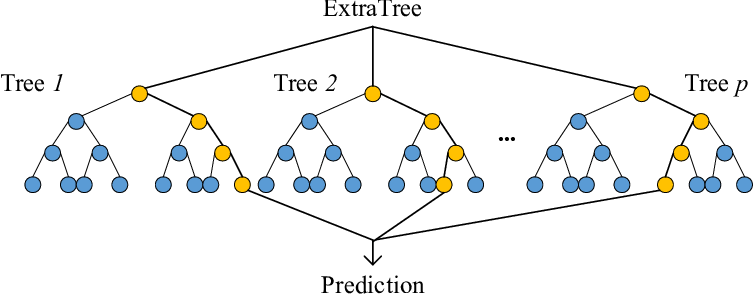

In [ ]:
from sklearn import ensemble
# Gradient Boosting (기울기)
# 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블
# 사이킷 런의 GradientBoostingClassifier는 기본적으로 깊이가 3인 결정트리를 100개 사용
# 때문에 과대적합에 강하고 일반적인 높은 일반화 성능을 기대함

# Gradient는 결사 하강법을 사용하여 트리를 앙상블에 추가함.
# 분류 : 로지스틱 손실 함수, 회귀에서는 평균 제급 오차 함수를 사용
# 경사 하강법 손실 함수를 산으로 정의하고 가장 낮은 곳으로 찾아 내려오는 과정

# 가장 낮은 곳으로 내려오는 방법은 모델의 가중치와 절편을 조금씩 바꾸는 것
# 결정 트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동, 손실 함수의 낮은 곳으로 천천히 이돌
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb,train_input,train_target,return_train_score=True,n_jobs=-1)

print(np.mean(scores['train_score']),np.mean(scores['test_score']))
# train_score : 88.81%, test_score : 87.20% 과대적합 해결

0.8881086892152563 0.8720430147331015


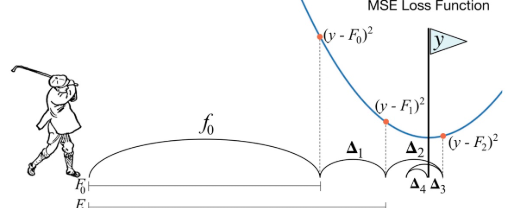

In [ ]:
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.2,random_state=42)
# 결정트리 개수를 기본값 100에서 500개로 늘림
# learning_rate 학습을 기본값 0.1에서 0.2로 늘림

scores = cross_validate(gb,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))
# train_score : 94.64%, test_score : 87.80%
# 훈련점수 검증 점수 차이가 10% 이상 나지 않아서 과대적합 X

0.9464595437171814 0.8780082549788999


In [ ]:
gb.fit(train_input,train_target) # 훈련 시작
print(gb.feature_importances_) # 중요도
# [0.15887763 0.6799705  0.16115187] 그레이디언트 부스팅 현재 결과
# [0.20183568 0.52242907 0.27573525] 엑스트라 트리 이전 결과
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과
# [0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과
#    alcohol     sugar       pH
# 1. Gradient Boosting 이 RandomForest보다 조금 더 성능이 높다.
# 2. 하지만 순서대로 트리를 추가하기 때문에 훈련속도가 좀 느리다.
# GradientBoostingClassifier에는 n_jobs=-1 매개값이 없다 (구형모델이라)
# ---------------------------- GradientBoosting 끝 ---------------------------------

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.15887763 0.6799705  0.16115187]


In [ ]:
# Histogram Gradient : 그라디언트 부스팅의 개선버전
# 입력 특성을 256 구간으로 나눔 -> 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있다.
# 특히 256 구간 중에서 하나를 떼어놓고 누락된 값을 위해서 사용함
# HistGradientBoostingClassifier는 기본 매개변수에서 안정적인 성능을 얻을 수 있다.
# 트리의 개수를 지정할 때 n_estimators 대신 max_iter를 사용함 ( 성능 향상용 )

# from sklearn.experimental import enable_hist_gradient_boosting 아직 개발중
from sklearn.ensemble import HistGradientBoostingClassifier # 분류용

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb,train_input,train_target,return_train_score=True,n_jobs=-1)

print(np.mean(scores['train_score']),np.mean(scores['test_score']))
# train_score :93.21% ,test_score :88.01% 과대적합 억제 성공!

0.9321723946453317 0.8801241948619236


In [ ]:
from sklearn.inspection import permutation_importance
# 특성 중요도 확인
# 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화되는지 관찰

# 히스토그램 기반의 훈련 진행 -> 훈련세트에서 특성 중요도를 계산해보자.
hgb.fit(train_input,train_target)

# n_repeats=10 랜덤하게 섞을 횟수 기본 5 -> 10
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)
#   알콜도수     당도        pH          비교 해보자.
# [0.08876275 0.23438522 0.08027708] 히스토그램 현재결과
# [0.15887763 0.6799705  0.16115187] 그레이디언트 부스팅 이전 결과
# [0.20183568 0.52242907 0.27573525] 엑스트라 트리 이전 결과
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과
# [0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.08876275 0.23438522 0.08027708]


In [ ]:
# 테스트 세트의 결과 확인
result = permutation_importance(
    hgb,test_input,test_target,n_repeats=10,random_state=42,n_jobs=-1)
print(result.importances_mean)
#    알콜도수    당도        pH
# [0.05969231 0.20238462 0.049     ] 히스토그램 테스트 세트에서 현재 결과
# [0.08876275 0.23438522 0.08027708] 히스토그램 훈련 세트 이전결과
# [0.15887763 0.6799705  0.16115187] 그레이디언트 부스팅 이전 결과
# [0.20183568 0.52242907 0.27573525] 엑스트라 트리 이전 결과
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과
# [0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

# HistGradientBoostingRegressor 히스토그램 기반 그레이디언트 부스팅의 회귀 버전
# ---------------------------- Histogram Gradient 끝 ---------------------------------

[0.05969231 0.20238462 0.049     ]


In [ ]:
# 사이킷런 말고도 그라디언트 부스팅 알고리즘을 구현한 라이브러리 다수 존재
# XGBoost * 대표적임 -> 크로스 검증이 가능
from xgboost import XGBClassifier

# tree_method='hist' 히스토그램 기반 그레이디언트 부스팅용
# 만약 안되면 파이썬에 설치가 안된것임
# !pip install xgboost
# !pip install pycaret -> 세션 다시 시작하고 위에서부터 다시 객체 생성함

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 95.58% , 87.82% 와인 교차 검증 점수

0.9567059184812372 0.8783915747390243


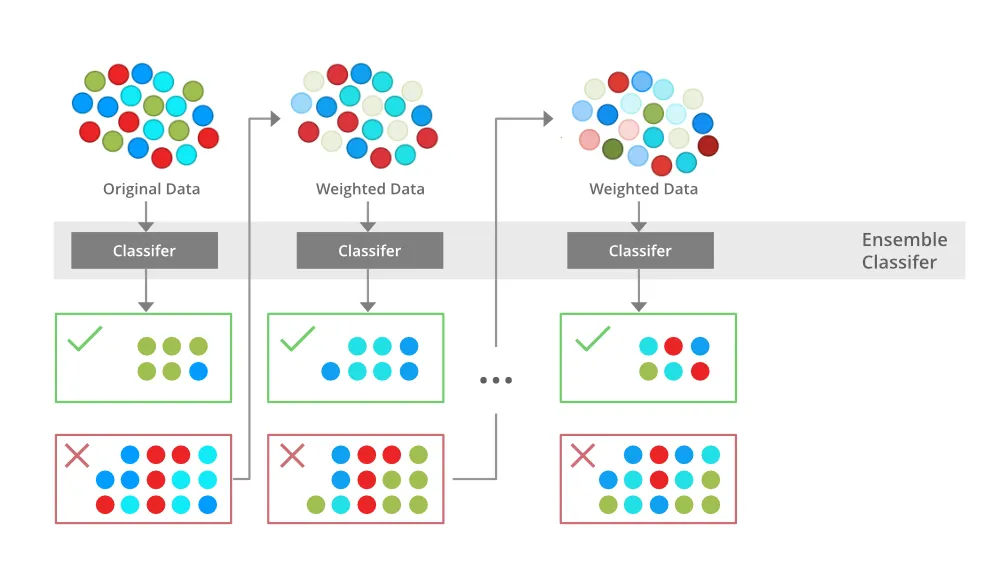

In [ ]:
# LGBMClassifier ms에서 만든 앙상블 LightGBM^2
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb,train_input,train_target,return_train_score=True,n_jobs=-1)

print(np.mean(scores['train_score']),np.mean(scores['test_score']))
# 93.58% , 88.01%

0.935828414851749 0.8801251203079884
